In [144]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_2020
%cd foster_2020/Homeworks

Cloning into 'foster_2020'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 297 (delta 61), reused 155 (delta 29), pack-reused 109
Receiving objects: 100% (297/297), 60.59 MiB | 19.43 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Checking out files: 100% (123/123), done.
/content/foster_2020/Homeworks/foster_2020/Homeworks/foster_2020/Homeworks/foster_2020/Homeworks


# Homework 4

## Part I: Sentiment Analysis for Movie Reviews

Sentiment analysis is a hot topic in data science right now due to the immense amount of user-generated text data being created every day online.  Businesses can now look at what is being said about them on review sites to get an idea of how well they are liked, how much they are disliked, and what they can do to improve.  While most of this data is unlabeled, some sites also ask users to provide a numerical or star rating.  This allows us to build a classifier for positive/negative reviews using the star rating as a label, which could then be hypothetically applied to unlabeled text.

IMDB collects information about movies and lets users write their own reviews, as well as provide a 1-10 numerical rating.   The data for this assignment can be found in 'IMDB_TRAIN.csv' and IMDB_TEST.csv', the training and test data respectively. It consists of thousands of positive and negative reviews collected from IMDB.  The ratings have been binarized by labeling anything with score between 7 and 10 as “P” and anything between 1 and 4 with “N” (there are no “neutral” reviews in the data).  You will build and evaluate a system that classifies these movie reviews as positive or negative.

__1. Load the training data and the test data. No points for this.__

In [145]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pylab as plt
# Remember to change this to the path of your files.
train_path = 'data/IMDB_TRAIN.csv'
test_path = 'data/IMDB_TEST.csv'

columns = ['text', 'class']
df_imdb_train = pd.read_csv(train_path, names=columns)
df_imdb_test = pd.read_csv(test_path, names=columns)
df_imdb_test.head()

,text,class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


__2. Build a Bernoulli Naive Bayes model to classify reviews according to their sentiment using a binary count vectorizer (check out the text mining module in the class notebooks if you do not know what this question is talking about). Test its accuracy on the test data. Is it good compared to just predicting a positive sentiment for all reviews?__

In [146]:
print(df_imdb_train['text'].isnull().values.any())
print(df_imdb_test['text'].isnull().values.any())

False
False


In [147]:
df_imdb_train['attitude'] = (df_imdb_train['class'] == "P").astype(int)
df_imdb_test['attitude'] = (df_imdb_test['class'] == "P").astype(int)
df_imdb_train=df_imdb_train.drop(['class'],axis=1)
df_imdb_test=df_imdb_test.drop(['class'],axis=1)
df_imdb_test.head()

,text,attitude
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


In [148]:
df_imdb_train.head()

,text,attitude
0,'If you hit your teens in the 70s as I did you...,0
1,'Excellent endearing film with Peter Falk and ...,1
2,'Oh dear what a horrid movie. The production w...,0
3,'This is a terrible production of Bartleby tho...,0
4,'I actually have a fondness for Christopher Le...,0


In [149]:
# Your answer here.
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
binary_vectorizer=CountVectorizer(binary=True)
binary_vectorizer.fit(df_imdb_train['text'])
X_train_binary=binary_vectorizer.transform(df_imdb_train['text'])
X_test_binary=binary_vectorizer.transform(df_imdb_test['text'])
clf=BernoulliNB()
clf.fit(X_train_binary,df_imdb_train['attitude'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [150]:
#clf.score(X_test_binary,df_imdb_test['attitude'])
test_result=clf.predict(X_test_binary)
acc=accuracy_score(df_imdb_test['attitude'],test_result)
print('prediction accuracy is '+str(acc)+' using Bernoulli Naive Bayes')

prediction accuracy is 0.9030588235294118 using Bernoulli Naive Bayes


In [151]:
original_acc=df_imdb_test['attitude'].value_counts()[1]/df_imdb_test.shape[0]
print('prediction accuracy is '+str(original_acc)+' if we predict all label to be positive')

prediction accuracy is 0.4988235294117647 if we predict all label to be positive


**Conclusion** 

using Bernoulli Naive Bayes is better than simply predicting all rows to be positive 

__3. Pick a few reviews in the test set that were incorrectly classified and read them through.  Are there any words in these misclassified reviews that may have misled the classifier?  Explain with at least three examples for each type of error (i.e., false positive and false negative).__
* For example: Instance number X contains the sentence, “Even her worst . . . I will stop here to avoid the spoiler.”  Even though this is actually positive, it was classified as a negative review; I would guess that this is due to the word “worst” in the review.

In [152]:
# Your answer here.
d={'pred':test_result,'real':df_imdb_test['attitude']}
df=pd.DataFrame(d)
df['match']=abs(df['pred']-df['real'])
mismatch_index=df.loc[df['match']==1].index
mismatch_index

Int64Index([  24,   26,   27,   36,   49,   51,   67,   80,   88,  103,
            ...
            8374, 8379, 8380, 8383, 8394, 8403, 8429, 8474, 8481, 8488],
           dtype='int64', length=824)

In [153]:
df.loc[(df['pred']==1) & (df['real']==0)].index

Int64Index([  26,   36,  174,  269,  293,  312,  315,  346,  404,  507,
            ...
            7958, 7963, 7983, 8176, 8185, 8210, 8321, 8344, 8373, 8488],
           dtype='int64', length=268)

In [154]:
print('False Negative NO.1:\n\nThe review is: \n'+str(df_imdb_test.loc[24][0])+'  \n\nThe real attitude is:'+str(df_imdb_test.loc[24][1])+'  However, the predicted class is '+str(test_result[24]))
print('\nEven though it is a positive review, the prediction is negative; I would guess that is because of the word "vague","unlawful" and "sadly" in the review.')
print('-----------------------------------------------------------------------------------\n')
print('False Negative NO.2:\n\nThe review is: \n'+str(df_imdb_test.loc[27][0])+'  \n\nThe real attitude is:'+str(df_imdb_test.loc[27][1])+'  However, the predicted class is '+str(test_result[27]))
print('\nEven though it is a positive review, the prediction is negative; I would guess that is because of the word "negative","stupid" and "strange" in the review.')
print('-----------------------------------------------------------------------------------\n')
print('False Negative NO.3:\n\nThe review is: \n'+str(df_imdb_test.loc[49][0])+'  \n\nThe real attitude is:'+str(df_imdb_test.loc[49][1])+'  However, the predicted class is '+str(test_result[49]))
print('\nEven though it is a positive review, the prediction is negative; I would guess that is because of the word "horrible" in the review.')
print('-----------------------------------------------------------------------------------\n')
print('False Positive NO.1:\n\nThe review is: \n'+str(df_imdb_test.loc[26][0])+'  \n\nThe real attitude is:'+str(df_imdb_test.loc[26][1])+'  However, the predicted class is '+str(test_result[26]))
print('\nEven though it is a negative review, the prediction is positive; I would guess that is because of the word "interesting" in the review.')
print('-----------------------------------------------------------------------------------\n')
print('False Positive NO.2:\n\nThe review is: \n'+str(df_imdb_test.loc[36][0])+'  \n\nThe real attitude is:'+str(df_imdb_test.loc[36][1])+'  However, the predicted class is '+str(test_result[36]))
print('\nEven though it is a negative review, the prediction is positive; I would guess that is because of the word  "interesting" in the review.')
print('-----------------------------------------------------------------------------------\n')
print('False Positive NO.3:\n\nThe review is: \n'+str(df_imdb_test.loc[174][0])+'  \n\nThe real attitude is:'+str(df_imdb_test.loc[174][1])+'  However, the predicted class is '+str(test_result[174]))
print('\nEven though it is a negative review, the prediction is positive; I would guess that is because of the word "fun" in the review.')

False Negative NO.1:

The review is: 
'CREEP is a straight up serious horror film set in real time that wants nothing more than to just show people get attacked in a empty subway platform by a mutant for 85 minutes. And it does just that. Nothing more nothing less. Director Christopher Smith draws out the drama a far as he plausibly can by introducing a series of characters that would actually have a reason to be in the subway after it is locked. He also leaves the origins of the titular Creep deliberately vague (unlawful experiments happening in the 60s underground are hinted at) and that little bit of mystery works for the most part. Sadly he undermines himself toward the end by actually holding back from a twist ending where more genetic malformations would appear (they are hinted at as well). Yes you heard me right - I wanted a clichéd twist ending! Franka (RUN LOLA RUN) Potente is good as the terrorized female lead and the rest of the cast is fine.'  

The real attitude is:1  Howe

__4. Improve the accuracy of your model on the test data. Try at least two of the following to do this:__
* __Use a non-binary count vectorizer or a tf-idf count vectorizer.__
* __Use n-grams.__
* __Remove stopwords.__

__If you want, you can try other classifiers besides Bernoulli Naive Bayes.__
__Please report the accuracies__

In [0]:
#use a tf-idf count vectorizer
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectorizer.fit(df_imdb_train['text'])
X_train_tfidf=tfidf_vectorizer.transform(df_imdb_train['text'])
X_test_tfidf=tfidf_vectorizer.transform(df_imdb_test['text'])
clftfidf=BernoulliNB()
clftfidf.fit(X_train_tfidf,df_imdb_train['attitude'])
test_result_tfidf=clftfidf.predict(X_test_tfidf)
acc_tfidf=accuracy_score(df_imdb_test['attitude'],test_result_tfidf)
#use n-grams
ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
ngram_vectorizer.fit(df_imdb_train['text'])
X_train_ngram=ngram_vectorizer.transform(df_imdb_train['text'])
X_test_ngram=ngram_vectorizer.transform(df_imdb_test['text'])
clfngram=BernoulliNB()
clfngram.fit(X_train_ngram,df_imdb_train['attitude'])
test_result_ngram=clfngram.predict(X_test_ngram)
acc_ngram=accuracy_score(df_imdb_test['attitude'],test_result_ngram)
#use n-grams and remove stop words
sw_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
sw_vectorizer.fit(df_imdb_train['text'])
X_train_sw=sw_vectorizer.transform(df_imdb_train['text'])
X_test_sw=sw_vectorizer.transform(df_imdb_test['text'])
clfsw=BernoulliNB()
clfsw.fit(X_train_sw,df_imdb_train['attitude'])
test_result_sw=clfsw.predict(X_test_sw)
acc_sw=accuracy_score(df_imdb_test['attitude'],test_result_sw)

In [156]:
print('prediction accuracy is '+str(acc_tfidf)+' using tf-idf count vetorizer euqals to the original '+str(acc))
print('prediction accuracy is '+str(acc_ngram)+' using ngram  better than the original '+str(acc))
print('prediction accuracy is '+str(acc_sw)+' using ngram and removing stop words better than the original '+str(acc))

prediction accuracy is 0.9030588235294118 using tf-idf count vetorizer euqals to the original 0.9030588235294118
prediction accuracy is 0.988 using ngram  better than the original 0.9030588235294118
prediction accuracy is 0.9931764705882353 using ngram and removing stop words better than the original 0.9030588235294118


## Part II: Multi-Class Text Classification

There are lots of applications of text classification in the commercial world. For example, news stories are typically organized by topics; content or products are often tagged by categories; users can be classified into cohorts based on how they talk about a product or brand online. 

Suppose you've been hired by a finance institution that wants to classify incoming consumer complaints in product categories in order to forward them to the most appropriate customer support agents. You have a sample of the complaints that have been addressed in the past, each of them labeled as one category by the agent that addressed the complaint. Each complaint is assigned to one and only one category. 

Let's take a look at the data.

__1. Load the data. No points for this.__

In [157]:
# Remember to change this to the path of your file.
complaints_path = 'data/complaints_sample.csv'

data = pd.read_csv(complaints_path)
data.head()

,Consumer complaint narrative,Product
0,This is not a duplicate case. Please escalate ...,Credit card or prepaid card
1,I reported the problem to Money gram agent. wo...,"Money transfer, virtual currency, or money ser..."
2,"Medical debt is not mine, debt is my sons who ...",Debt collection
3,"Someone called me yesterday morning, XX/XX/201...",Debt collection
4,This is a debt with Conn 's - I am not 30 days...,Debt collection


__2. Print how many complaints there are for each product category.__

In [158]:
# Your answer here.
data.groupby(['Product']).size().reset_index(name='counts')

,Product,counts
0,Bank account or service,2985
1,Checking or savings account,2485
2,Consumer Loan,1868
3,Credit card or prepaid card,8333
4,"Credit reporting, credit repair services, or o...",24401
5,Debt collection,17065
6,"Money transfer, virtual currency, or money ser...",1345
7,Mortgage,10552
8,"Payday loan, title loan, or personal loan",1223
9,Student loan,4184


__3. Split the data into a training and a test set. Build a logistic regression model to classify complaints according to product categories. Report its accuracy when applied to the test set. Why is this number relatively low compared to the binary accuracy in Part I? HINT: You may want to use [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) to transform the target variable into a categorical variable. Take a look at the sample code below.__

In [0]:
# Your answer here.
from sklearn.model_selection import train_test_split
Y,cat_names=data['Product'].factorize()
X=data['Consumer complaint narrative']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [0]:
lbinary_vectorizer=CountVectorizer()
lbinary_vectorizer.fit(X_train)
X_train_lbinary=lbinary_vectorizer.transform(X_train)
X_test_lbinary=lbinary_vectorizer.transform(X_test)

In [161]:
model_binary=LogisticRegression(solver='lbfgs',max_iter=3000)
model_binary.fit(X_train_lbinary,Y_train)
logistic_result_binary=model_binary.predict(X_test_lbinary)
acc_lb=accuracy_score(Y_test,logistic_result_binary)
print('the accuracy of using binary logistic regression model is '+str(acc_lb)+'  relatively lower than binary accuracy   '+str(acc))

the accuracy of using binary logistic regression model is 0.7752563678465101  relatively lower than binary accuracy   0.9030588235294118


**Answer** 

softmax function in multi classification logistic regression blows small difference out of proportion which makes the classfier biased toward a particular class which is not desired. And that's the reseason of the relatively low prediction accuracy when applying that model to our data.

__4. Make a confusion matrix that shows the errors made by your model. Use the test set labels and your predictions for the test set to build the matrix. Plot the confusion matrix using a Seaborn heatmap. What would perfect predictions look like? Give an example of one systematic type of error that you see. How can you tell that this is a systematic error? Why do you think such errors occur? HINT: Below there is code building and plotting a confusion matrix using the entire data and random predictions. The code removes the diagonal to highlight prediction errors.__

heatmap of confusion matrix without diagnal values:



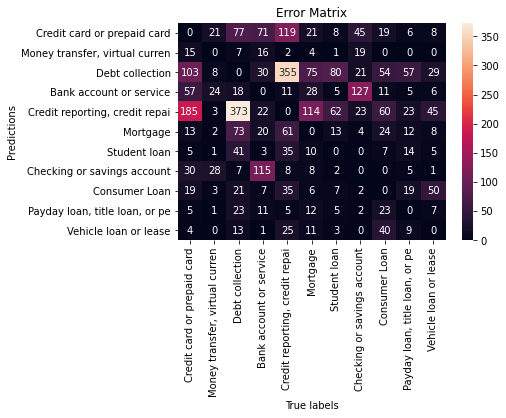

In [162]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = [c[:30] for c in cat_names]
def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

lg_predictions = logistic_result_binary
lg_conf_mat = confusion_matrix(lg_predictions, Y_test)
print('heatmap of confusion matrix without diagnal values:\n')
plot_matrix(lg_conf_mat, 'Error Matrix', remove_diagonal=True)

heatmap of confusion matrix with diagnal values:



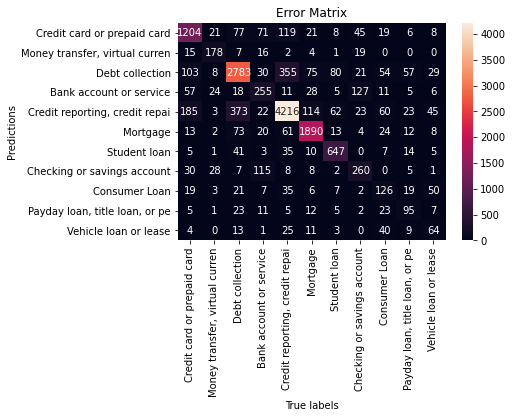

In [163]:
print('heatmap of confusion matrix with diagnal values:\n')
plot_matrix(lg_conf_mat, 'Error Matrix', remove_diagonal=False)

**Answer:**

1) Perfect predictions will have bigger numbers in the diagnal from left up corner to right down corner. And the matrice is supposed to have minimum values in other areas.

2) The error is the result of the model itself,which cannot be solved be human actions.

3) The systematic error should be bias. It is caused by our model itself. For example, our logistic regression model is not complicated enough, which means it cannot capture as many features as our data have. From that perspective, the bias between prediction value and real value are a kind of systematic error. And it cannot be eliminated by human beings.

__5. Suppose that the priority level of complaints varies by product category. You know that higher priority complaints need to be addressed faster. You also know that complaints incorrectly classified by the model will be given the correct classification (and therefore also the correct priority) by the first agent to which the complaint is assigned. If the agent has no knowledge about the product category of the complaint, he/she can forward the complaint to someone else. This is how priority level varies by product:__

__High priority__
* 'Money transfer, virtual currency, or money service'
* 'Bank account or service'
* 'Checking or savings account'

__Normal priority__
* 'Credit card or prepaid card'
* 'Mortgage'
* 'Student loan'
* 'Consumer Loan'
* 'Payday loan, title loan, or personal loan'
* 'Vehicle loan or lease'

__Low priority__
* 'Credit reporting, credit repair services, or other personal consumer reports'
* 'Debt collection'

__Below you will find three cost matrices. Compute the total cost of your model according to each of them. If you were to compare multiple models, which cost matrix do you think would be better to compare the models? Why? Would you consider making any modifications to the cost matrix that you chose? If so, explain what would you consider changing and why. HINT: Below there is a sample code of how to compute the total cost of the random predictions.__

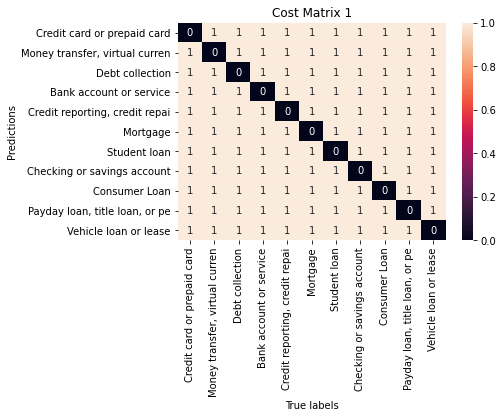

In [164]:
cost_matrix_1 = np.array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_1, 'Cost Matrix 1')

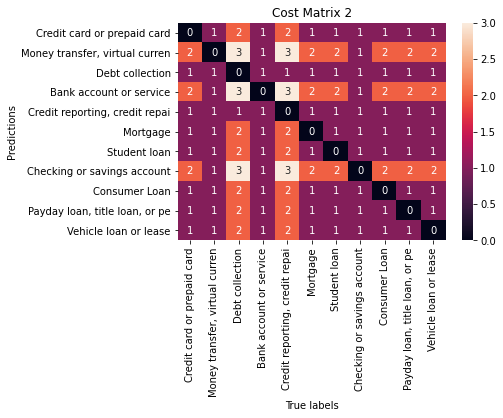

In [165]:
cost_matrix_2 = np.array([[0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_2, 'Cost Matrix 2')

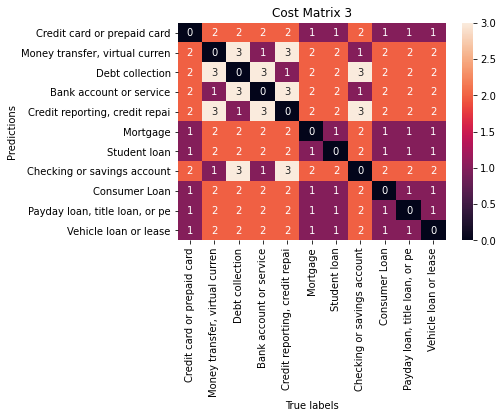

In [166]:
cost_matrix_3 = np.array([[0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 2],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 1, 3, 0, 2, 2, 3, 2, 2, 2],
                          [1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1],
                          [1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0]])
plot_matrix(cost_matrix_3, 'Cost Matrix 3')

**Answer:**

The third matrix is better. According to the priority list, cost of incorrect classification of high priority should be the highest. And the minimum cost should be related to those complaints with low priority. So the third one is the best choice

In [172]:
# Replace random_conf_mat with the confusion matrix you generated in the last question.

print("Cost with matrix 1: ", (lg_conf_mat * cost_matrix_1).sum())
print("Cost with matrix 2: ", (lg_conf_mat * cost_matrix_2).sum())
print("Cost with matrix 3: ", (lg_conf_mat * cost_matrix_3).sum())

Cost with matrix 1:  3397
Cost with matrix 2:  4209
Cost with matrix 3:  5504


**Answer:**

YES. I prefer to make slight modifications to the third matrix (the new matrix as follows). Since the value is not reseaonably distributed,though it functions well when performing cost analysis.However, there are three types of incorrect classification. 1. higher priority incorrectly classified as lower ones 2.lower priority incorrectly classified as higher ones 3.priority incorrectly classified as other classes with same priority. Those types of errors should be treated differently.

The new matrix principle:

1) if a class with higher priority is classified as one with lower priority, the cost would be 3(high-low), 2(normal-low)

2) if a class with lower priority is classified as one with equal or higher priority, the cost would be 1(high-high, normal-normal, low-low, normal-high, low-high, low-normal)



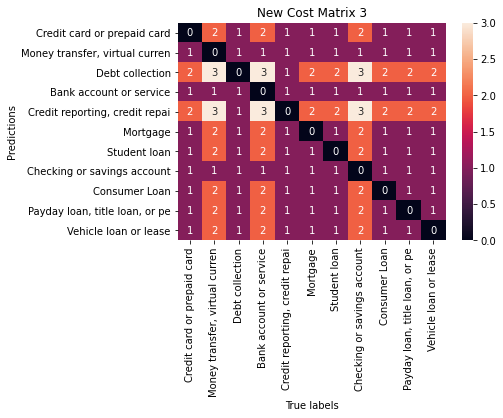

In [176]:
new_cost_matrix_3 = np.array([[0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 2],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
                          [2, 3, 1, 3, 0, 2, 2, 3, 2, 2, 2],
                          [1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1],
                          [1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1],
                          [1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1],
                          [1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0]])
plot_matrix(new_cost_matrix_3, 'New Cost Matrix 3')

In [178]:
print("Cost with new matrix 3: ", (lg_conf_mat * new_cost_matrix_3).sum())

Cost with new matrix 3:  4692
